In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report

#### Data Analysis

In [2]:
df1 = pd.DataFrame(pd.read_csv('customer-churn-data.csv'))
df1

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [3]:
df1.dtypes

CustomerID                int64
Age                       int64
Gender                   object
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                 bool
PromotionResponse        object
Churn                      bool
dtype: object

In [4]:
df1.shape

(1000, 15)

In [5]:
df1.describe()

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [6]:
df1.isna().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
TotalSpend              0
YearsAsCustomer         0
NumOfPurchases          0
AvgTransactionAmount    0
NumOfReturns            0
NumOfSupportQueries     0
SatisfactionScore       0
LastPurchaseDaysAgo     0
EmailOptIn              0
PromotionResponse       0
Churn                   0
dtype: int64

<Axes: >

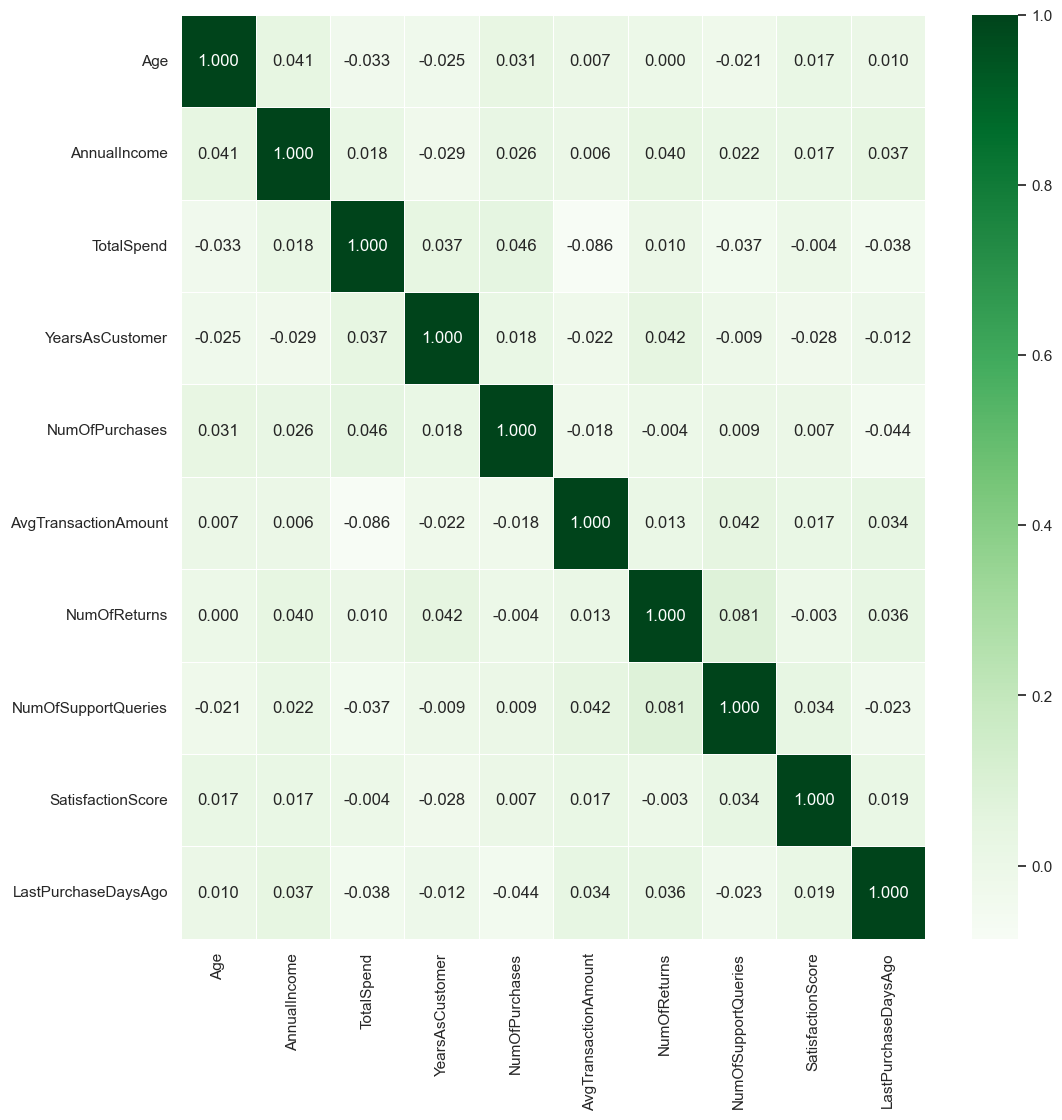

In [7]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64"])
sns.set_theme(rc={'figure.figsize':(12,12)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

In [8]:
df = df1
df

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


##### Encoding the data to numeric

In [9]:
df1[['Gender', 'EmailOptIn', 'PromotionResponse', 'Churn']] = df1[['Gender', 'EmailOptIn', 'PromotionResponse', 'Churn']].apply(LabelEncoder().fit_transform)
df1

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,1
1,2,65,1,79.51,9025.47,13,77,22.90,2,2,3,227,0,1,0
2,3,18,1,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1
3,4,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,1,0,1
4,5,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,1,143.72,1089.09,2,29,77.75,0,3,2,88,1,0,0
996,997,19,1,164.19,3700.24,9,90,34.45,6,4,4,352,0,1,1
997,998,47,0,113.31,705.85,17,69,187.37,7,3,1,172,1,2,0
998,999,23,1,72.98,3891.60,7,31,483.80,1,2,5,55,0,1,1


In [10]:
df1.dtypes

CustomerID                int64
Age                       int64
Gender                    int32
AnnualIncome            float64
TotalSpend              float64
YearsAsCustomer           int64
NumOfPurchases            int64
AvgTransactionAmount    float64
NumOfReturns              int64
NumOfSupportQueries       int64
SatisfactionScore         int64
LastPurchaseDaysAgo       int64
EmailOptIn                int64
PromotionResponse         int32
Churn                     int64
dtype: object

In [11]:
df1.isna().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
TotalSpend              0
YearsAsCustomer         0
NumOfPurchases          0
AvgTransactionAmount    0
NumOfReturns            0
NumOfSupportQueries     0
SatisfactionScore       0
LastPurchaseDaysAgo     0
EmailOptIn              0
PromotionResponse       0
Churn                   0
dtype: int64

<Axes: >

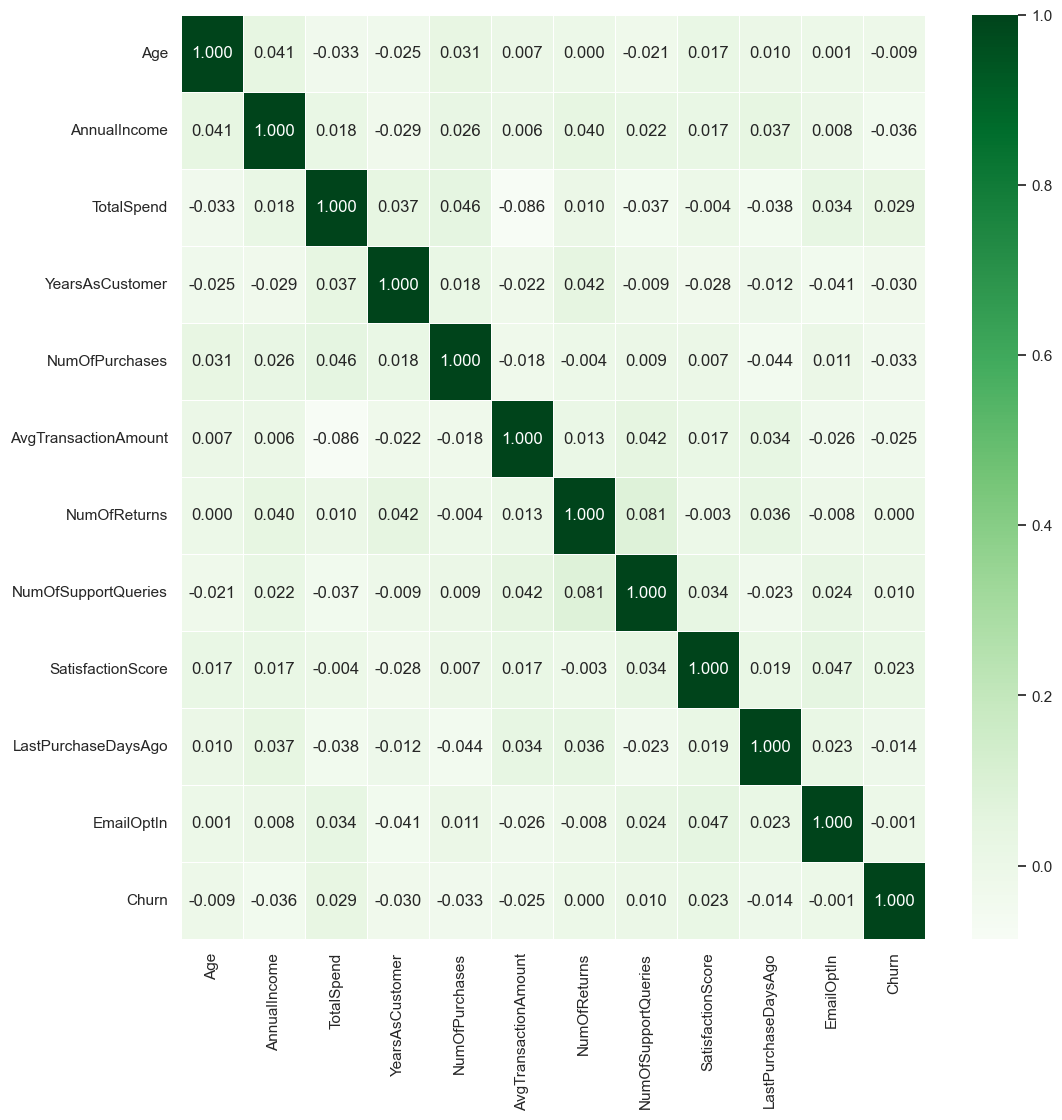

In [12]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64"])
sns.set_theme(rc={'figure.figsize':(12,12)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

In [13]:
(df1['Churn']==1).sum()

526

In [14]:
scaled_df = StandardScaler().fit_transform(df1.values)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df1.columns
scaled_df

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,-1.730320,1.229628,1.247718,-1.264973,0.283773,-0.854240,-0.962378,1.282050,-0.902114,-1.379444,0.018689,-0.516489,0.943588,-0.073945,0.949284
1,-1.726856,1.426547,0.022062,-0.614434,1.378924,0.591480,0.965463,-1.673359,-0.902114,0.047075,0.018689,0.422756,-1.059784,-0.073945,-1.053425
2,-1.723391,-1.658518,0.022062,-1.567145,-1.559749,0.591480,0.755153,-1.483853,0.134005,0.047075,-0.700136,0.959468,-1.059784,-0.073945,0.949284
3,-1.719927,-1.461599,1.247718,-0.612162,1.408578,-1.215669,-0.576810,0.994191,0.134005,0.760335,1.456339,0.413172,0.943588,-1.306354,0.949284
4,-1.716463,-1.461599,1.247718,-0.649460,0.108396,0.952910,-0.226294,-1.136392,-0.556741,-1.379444,1.456339,0.566518,-1.059784,1.158465,-1.053425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.704511,0.022062,0.601258,-1.395363,-1.396384,-0.717017,-1.297160,-1.592861,0.760335,-0.700136,-0.909438,0.943588,-1.306354,-1.053425
996,1.719927,-1.592878,0.022062,0.988817,-0.482594,-0.131380,1.421134,-1.594141,0.479378,1.473594,0.737514,1.620773,-1.059784,-0.073945,0.949284
997,1.723391,0.245033,-1.203594,0.025504,-1.529330,1.314340,0.685050,-0.545310,0.824751,0.760335,-1.418961,-0.104371,0.943588,1.158465,-1.053425
998,1.726856,-1.330319,0.022062,-0.738066,-0.415701,-0.492810,-0.646913,1.487810,-1.247487,0.047075,1.456339,-1.225715,-1.059784,-0.073945,0.949284


#### Outlier Detection using DBScan

In [15]:
dbscan = DBSCAN(eps = 4,min_samples = 10)
model = dbscan.fit(scaled_df)
labels = model.labels_

# -1 value in anomaly_score column signifies that the data is anomalous
scaled_df["anomaly_score"] = labels
anomalies = scaled_df[scaled_df.anomaly_score == -1]
anomalies.shape

(0, 16)

No outlier detected

#### Train Test Split

In [16]:
X = df1.iloc[:,1:14] # customer id is excluded as it is independent of Churn
y = df1["Churn"] # feature to be predicted
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 20% is for

#### Adaboost Classifier with Decision Trees as Base Model

In [17]:
abc = AdaBoostClassifier()
parameters = dict()
parameters["estimator"] = [DecisionTreeClassifier(max_depth=2)]
parameters["algorithm"] = ["SAMME"]
parameters["n_estimators"] = [i for i in range(25, 200, 25)]
parameters["learning_rate"] = [0.5, 1, 1.5, 2]

##### Using Hyperparametric Tuning

In [18]:
abc_clf = GridSearchCV(abc,param_grid = parameters,n_jobs=-1,cv=5,verbose=3,return_train_score=True,scoring="accuracy")

##### Fitting the model and Training it

In [19]:
abc_clf.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'estimator': [DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.5, 1, 1.5, 2],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [20]:
## best score obtained
abc_clf.best_score_

0.51875

In [21]:
abc_clf = abc_clf.best_estimator_

In [22]:
abc_clf.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=2, n_estimators=25)>

In [23]:
## score on training set
abc_clf.score(X_train,y_train)

0.61375

#### Testing the model

In [24]:
## score on test set
abc_clf.score(X_test,y_test)

0.605

#### Classification Report

In [25]:
## on train data
print(classification_report(y_train,abc_clf.predict(X_train),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.627     0.461     0.531       380
       Churn      0.607     0.752     0.672       420

    accuracy                          0.614       800
   macro avg      0.617     0.606     0.601       800
weighted avg      0.616     0.614     0.605       800



In [26]:
## on test data
print(classification_report(y_test,abc_clf.predict(X_test),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.623     0.404     0.490        94
       Churn      0.597     0.783     0.678       106

    accuracy                          0.605       200
   macro avg      0.610     0.594     0.584       200
weighted avg      0.609     0.605     0.590       200



In [27]:
## confusion matrix for train data
confusion_matrix(y_train,abc_clf.predict(X_train))

array([[175, 205],
       [104, 316]], dtype=int64)

In [28]:
## confusion matrix for test data
confusion_matrix(y_test,abc_clf.predict(X_test))

array([[38, 56],
       [23, 83]], dtype=int64)

In [29]:
## accuracy, precision, recall, f1-score
print("accuracy is ",abc_clf.score(X_test,y_test))
print("precision is ",precision_score(y_test,abc_clf.predict(X_test)))
print("recall is ",recall_score(y_test,abc_clf.predict(X_test)))
print("F1 score is ",f1_score(y_test,abc_clf.predict(X_test)))


accuracy is  0.605
precision is  0.5971223021582733
recall is  0.7830188679245284
F1 score is  0.6775510204081633


### Random Forest Classifier

In [30]:
rfc = RandomForestClassifier()
parameters = dict()
parameters["n_estimators"] = [i for i in range(25,200,25)]
parameters["criterion"] = ["gini"]
parameters["max_features"] = ["log2","sqrt"]
parameters['max_depth'] = [2,3]
parameters['oob_score'] = [True,False]
parameters['random_state'] = [42]
rfc_clf = GridSearchCV(rfc,param_grid=parameters,n_jobs=-1,verbose=3,return_train_score=True,cv=4,scoring="accuracy")

In [31]:
## data fitted in classification model where the train  test split is as in the previous model
rfc_clf.fit(X_train,y_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175],
                         'oob_score': [True, False], 'random_state': [42]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [32]:
rfc_clf.best_score_

0.5425

In [33]:
rfc_clf=rfc_clf.best_estimator_

In [34]:
rfc_clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=175,
                       oob_score=True, random_state=42)>

In [35]:
## score on train set
rfc_clf.score(X_train,y_train)

0.6775

#### Testing the model

In [36]:
## score on test data
rfc_clf.score(X_test,y_test)

0.565

#### Classification Report

In [37]:
## on train data
print(classification_report(y_train,rfc_clf.predict(X_train),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.901     0.361     0.515       380
       Churn      0.625     0.964     0.758       420

    accuracy                          0.677       800
   macro avg      0.763     0.662     0.637       800
weighted avg      0.756     0.677     0.643       800



In [38]:
## on test data
print(classification_report(y_test,rfc_clf.predict(X_test),target_names=("Not Churn","Churn"),digits=3))

              precision    recall  f1-score   support

   Not Churn      0.667     0.149     0.243        94
       Churn      0.553     0.934     0.695       106

    accuracy                          0.565       200
   macro avg      0.610     0.541     0.469       200
weighted avg      0.606     0.565     0.483       200



In [39]:
## confusion matrix for train data
confusion_matrix(y_train,rfc_clf.predict(X_train))

array([[137, 243],
       [ 15, 405]], dtype=int64)

In [40]:
## confusion matrix for test data
confusion_matrix(y_test,rfc_clf.predict(X_test))

array([[14, 80],
       [ 7, 99]], dtype=int64)

In [41]:
## accuracy, precision, recall, f1-score
print("accuracy is ",rfc_clf.score(X_test,y_test))
print("precision is ",precision_score(y_test,rfc_clf.predict(X_test)))
print("recall is ",recall_score(y_test,rfc_clf.predict(X_test)))
print("F1 score is ",f1_score(y_test,rfc_clf.predict(X_test)))

accuracy is  0.565
precision is  0.553072625698324
recall is  0.9339622641509434
F1 score is  0.6947368421052631
